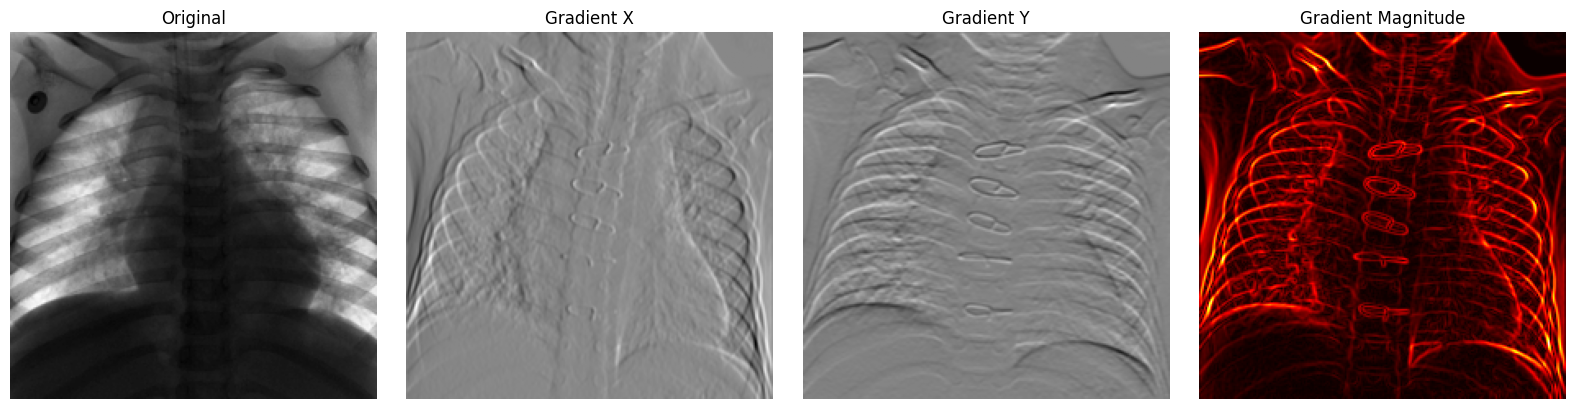

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# ---- Load and preprocess images ----

def load_images_from_folder(folder, image_size=(224, 224), max_images=None):
    images = []
    for i, filename in enumerate(os.listdir(folder)):
        if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):
            if max_images and i >= max_images:
                break
            img = Image.open(os.path.join(folder, filename)).convert('L')
            img = img.resize(image_size)
            images.append(np.array(img) / 255.0)
    return np.array(images)

# ---- Define Sobel kernels ----

SOBEL_X = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

SOBEL_Y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# ---- Convolution function ----

def convolve(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad = kh // 2
    padded = np.pad(image, pad, mode='edge')
    output = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

# ---- Gradient computation ----

def compute_gradients(image):
    grad_x = convolve(image, SOBEL_X)
    grad_y = convolve(image, SOBEL_Y)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    orientation = np.arctan2(grad_y, grad_x)
    return grad_x, grad_y, magnitude, orientation

# ---- Run on sample data ----

# Example: Replace with your actual path to training data
train_folder = "data - Copy/Train"

# Load a few sample images
images = load_images_from_folder(train_folder)

# Compute and visualize gradients for the first image
grad_x, grad_y, mag, ori = compute_gradients(images[0])

# ---- Visualize ----
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(images[100], cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(grad_x, cmap='gray')
axs[1].set_title('Gradient X')
axs[2].imshow(grad_y, cmap='gray')
axs[2].set_title('Gradient Y')
axs[3].imshow(mag, cmap='hot')
axs[3].set_title('Gradient Magnitude')
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def compute_magnitude_features(images):
    features = []
    for img in images:
        grad_x = convolve(img, SOBEL_X)
        grad_y = convolve(img, SOBEL_Y)
        magnitude = np.sqrt(grad_x**2 + grad_y**2)
        features.append(magnitude.flatten())
    return np.array(features)   


In [4]:
# Replace with actual paths
X_train_images = load_images_from_folder("data - Copy/Train")
X_test_images = load_images_from_folder("data - Copy/Test")

X_train = compute_magnitude_features(X_train_images)
X_test = compute_magnitude_features(X_test_images)

# Labels based on filenames (0 = healthy, 1 = pneumonia)
def extract_labels(folder):
    labels = []
    for fname in sorted(os.listdir(folder)):
        labels.append(1 if "positive" in fname.lower() else 0)
    return np.array(labels)

y_train = extract_labels("data - Copy/Train")
y_test = extract_labels("data - Copy/Test")


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lambdas = [0.01, 0.1, 1, 10]
results = []
iter_acc = []
max_iters = [10, 50, 100, 200, 500, 600, 700, 800, 900, 1000]
for iter in max_iters:
    print(f"Max iterations: {iter}")

    for lam in lambdas:
        model = LogisticRegression(penalty='l2', C=1/lam, max_iter=iter)
        # Early stopping
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((lam, acc, model))
        iter_acc.append((lam, acc, iter))
        print(f"λ = {lam} → Accuracy: {acc:.4f}")

Max iterations: 10


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


λ = 0.01 → Accuracy: 0.8045


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


λ = 0.1 → Accuracy: 0.8045


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


λ = 1 → Accuracy: 0.8045


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


λ = 10 → Accuracy: 0.7981
Max iterations: 50
λ = 0.01 → Accuracy: 0.7949
λ = 0.1 → Accuracy: 0.7869
λ = 1 → Accuracy: 0.8349
λ = 10 → Accuracy: 0.8221
Max iterations: 100
λ = 0.01 → Accuracy: 0.7949
λ = 0.1 → Accuracy: 0.7869
λ = 1 → Accuracy: 0.8349
λ = 10 → Accuracy: 0.8221
Max iterations: 200
λ = 0.01 → Accuracy: 0.7949
λ = 0.1 → Accuracy: 0.7869
λ = 1 → Accuracy: 0.8349
λ = 10 → Accuracy: 0.8221
Max iterations: 500
λ = 0.01 → Accuracy: 0.7949
λ = 0.1 → Accuracy: 0.7869
λ = 1 → Accuracy: 0.8349
λ = 10 → Accuracy: 0.8221
Max iterations: 600
λ = 0.01 → Accuracy: 0.7949
λ = 0.1 → Accuracy: 0.7869
λ = 1 → Accuracy: 0.8349
λ = 10 → Accuracy: 0.8221
Max iterations: 700
λ = 0.01 → Accuracy: 0.7949
λ = 0.1 → Accuracy: 0.7869
λ = 1 → Accuracy: 0.8349
λ = 10 → Accuracy: 0.8221
Max iterations: 800
λ = 0.01 → Accuracy: 0.7949
λ = 0.1 → Accuracy: 0.7869
λ = 1 → Accuracy: 0.8349
λ = 10 → Accuracy: 0.8221
Max iterations: 900
λ = 0.01 → Accuracy: 0.7949
λ = 0.1 → Accuracy: 0.7869
λ = 1 → Accuracy: 

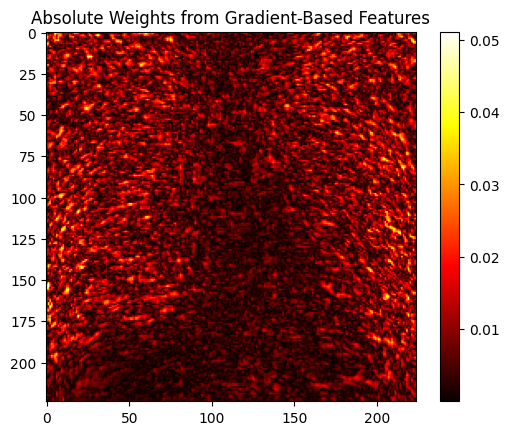

In [13]:
import matplotlib.pyplot as plt

# Pick best model
best_model = max(results, key=lambda x: x[1])[2]
best_weights = best_model.coef_.reshape(224, 224)

plt.imshow(np.abs(best_weights), cmap='hot')
plt.title('Absolute Weights from Gradient-Based Features')
plt.colorbar()
plt.show()


In [14]:

from sklearn.metrics import accuracy_score, classification_report

# Predict labels for the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed performance report
print(classification_report(y_test, y_pred, target_names=["Healthy", "Pneumonia"]))

Test Accuracy: 0.6154
              precision    recall  f1-score   support

     Healthy       0.35      0.03      0.06       234
   Pneumonia       0.62      0.97      0.76       390

    accuracy                           0.62       624
   macro avg       0.49      0.50      0.41       624
weighted avg       0.52      0.62      0.49       624
